# Naive Bayes With Python

## Step1 Generate the training data
variable `x` represents the characters of the data while variable `y` stands for different class of data.  
Use function `np.unique` to extract the label and store the numbers of different characters of different type of data in the dictionary `counts`.

In [1]:
import numpy as np
x = np.array([[0,1,0,1],
             [1,1,1,0],
             [0,1,1,0],
             [0,0,0,1],
             [0,1,1,0],
             [0,1,0,1],
             [1,0,0,1]])
y = np.array([0,1,1,0,1,0,0])
counts = {}
for label in np.unique(y):
    counts[label] = x[y == label].sum(axis=0)
counts

{0: array([1, 2, 0, 4]), 1: array([1, 3, 3, 0])}

## Step2 Use BernoulliNB to train the data

In [3]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(x,y)
next_day=[[0,0,1,0]]
clf.predict(next_day)

array([1])

In [4]:
clf.predict_proba(next_day)

array([[0.13848881, 0.86151119]])

In [6]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
x, y = make_blobs(n_samples=500, centers=5, random_state=8)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=8)
nb = BernoulliNB()
nb.fit(x_train,y_train)
nb.score(x_test, y_test)

0.544

## Step3: visualize the results

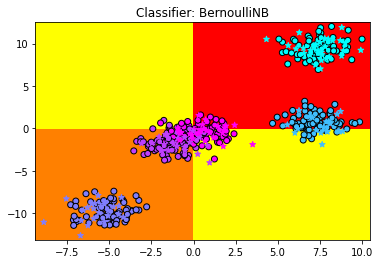

In [11]:
import matplotlib.pyplot as plt
x_min, x_max = x[:,0].min()-0.5, x[:,0].max()+0.5
y_min, y_max = x[:,1].min()-0.5, x[:,1].max()+0.5
xx, yy =np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min,y_max,0.02))
z = nb.predict(np.c_[(xx.ravel(), yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx,yy,z,cmap=plt.cm.autumn)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=plt.cm.cool,edgecolor='k')
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap=plt.cm.cool,marker='*')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Classifier: BernoulliNB')
plt.show()

## The Example of GaussianNB

In [12]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb.score(x_test, y_test)

0.968

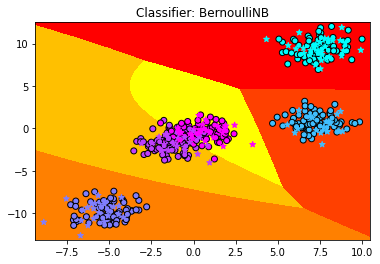

In [13]:
z = gnb.predict(np.c_[(xx.ravel(), yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx,yy,z,cmap=plt.cm.autumn)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=plt.cm.cool,edgecolor='k')
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap=plt.cm.cool,marker='*')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Classifier: BernoulliNB')
plt.show()

## The Example of MultinomialNB
** Warning: ** Be sure that the values in data `x` are higher than 0.In order to avoid the error, use `MinMaxScaler` to transform the data before Using `MultinomialNB.fit()`

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
mnb = MultinomialNB()
mnb.fit(x_train_scaled, y_train)
mnb.score(x_test_scaled, y_test)

0.32

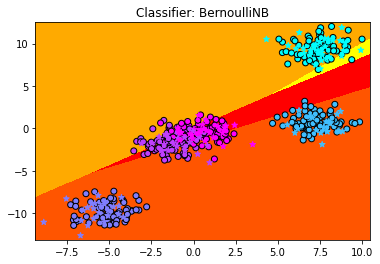

In [16]:
z = mnb.predict(np.c_[(xx.ravel(), yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx,yy,z,cmap=plt.cm.autumn)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=plt.cm.cool,edgecolor='k')
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap=plt.cm.cool,marker='*')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Classifier: BernoulliNB')
plt.show()

`MinMaxScaler`的作用是对数据进行预处理，使得数据集集中在0-1区间内。